In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import unicodedata
import spacy
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import ToktokTokenizer

In [28]:
df = pd.read_csv('Medium_AggregatedData.csv', sep=',')

In [29]:
df.shape

(279577, 50)

In [30]:
df = df[df['language']=='en']

In [31]:
df_useful_columns = df.drop(['audioVersionDurationSec', 'codeBlockCount','isSubscriptionLocked','publicationdescription','publicationdomain','publicationfacebookPageName','publicationfollowerCount','publicationname','publicationpublicEmail',
                                                              'publicationslug','publicationtags','bio','userId','userName','usersFollowedByCount','usersFollowedCount','scrappedDate','codeBlock', 'publicationtwitterUsername', 'author'], axis=1)

In [32]:
#df_drop_duplicate = df_useful_columns.drop_duplicates(subset='postId')

In [33]:
df_useful_columns.columns

Index(['collectionId', 'createdDate', 'createdDatetime', 'firstPublishedDate',
       'firstPublishedDatetime', 'imageCount', 'language',
       'latestPublishedDate', 'latestPublishedDatetime', 'linksCount',
       'postId', 'readingTime', 'recommends', 'responsesCreatedCount',
       'socialRecommendsCount', 'subTitle', 'tagsCount', 'text', 'title',
       'totalClapCount', 'uniqueSlug', 'updatedDate', 'updatedDatetime', 'url',
       'vote', 'wordCount', 'tag_name', 'slug', 'name', 'postCount'],
      dtype='object')

In [34]:
df_test = df_useful_columns.drop(['collectionId', 'createdDate', 'createdDatetime', 'firstPublishedDate',
       'firstPublishedDatetime', 'imageCount', 'language',
       'latestPublishedDate', 'latestPublishedDatetime', 'linksCount',
       'readingTime', 'recommends', 'responsesCreatedCount',
       'socialRecommendsCount', 'subTitle', 'tagsCount',
       'totalClapCount', 'uniqueSlug', 'updatedDate', 'updatedDatetime', 'url',
       'vote', 'wordCount', 'slug', 'name', 'postCount'], axis=1)

In [35]:
df_test.shape

(257655, 4)

In [36]:
#df_test.to_csv('df_test.csv', sep=',')

In [37]:
df_dummy = df_test.copy()

In [38]:
df_dummy

postId                                               text  \
0       10007d3018fe  Private Business, Government and Blockchain\n\...   
1       10007d3018fe  Private Business, Government and Blockchain\n\...   
2       10007d3018fe  Private Business, Government and Blockchain\n\...   
3       1000c43bcb97  EPQ draft 1 (4844 words)\nhttps://upload.wikim...   
4       1000c43bcb97  EPQ draft 1 (4844 words)\nhttps://upload.wikim...   
5       1000c43bcb97  EPQ draft 1 (4844 words)\nhttps://upload.wikim...   
6       1000c43bcb97  EPQ draft 1 (4844 words)\nhttps://upload.wikim...   
7       100139913e4c  Ascent of data Science, SAS and Big data Analy...   
8       100139913e4c  Ascent of data Science, SAS and Big data Analy...   
9       100139913e4c  Ascent of data Science, SAS and Big data Analy...   
10      100139913e4c  Ascent of data Science, SAS and Big data Analy...   
11      1002a55eca89  Can a robot love us better than another human ...   
12      1002a55eca89  Can a robot love us better than another human ...   
13      1002a55eca89  Can a robot love us better than another human ...   
14      1002a55eca89  Can a robot love us better than another human ...   
15      1002a55eca89  Can a robot love us better than another human ...   
16      10033db0a000  2017 Big Data, AI and IOT Use Cases\nAn Active...   
17      10033db0a000  2017 Big Data, AI and IOT Use Cases\nAn Active...   
18      10033db0a000  2017 Big Data, AI and IOT Use Cases\nAn Active...   
19      10033db0a000  2017 Big Data, AI and IOT Use Cases\nAn Active...   
20      10033db0a000  2017 Big Data, AI and IOT Use Cases\nAn Active...   
25       1003ff48854  Artificial Intelligence is the Next Frontier\n...   
26       10048798ad6  Aidoc Gets CE Mark for Deep Learning Solution\...   
27       10048798ad6  Aidoc Gets CE Mark for Deep Learning Solution\...   
28       10048798ad6  Aidoc Gets CE Mark for Deep Learning Solution\...   
29       10048798ad6  Aidoc Gets CE Mark for Deep Learning Solution\...   
30       10048798ad6  Aidoc Gets CE Mark for Deep Learning Solution\...   
31      10050686d0e4  Ai and it’s impact on the world\n\n\nActually ...   
32      10062f0bf74c  The Meta Model and Meta Meta-Model of Deep Lea...   
33      10062f0bf74c  The Meta Model and Meta Meta-Model of Deep Lea...   
...              ...                                                ...   
279542  ffd32ca76af7  Reality Check: Is Cloudera really a “leader” i...   
279543  ffd32ca76af7  Reality Check: Is Cloudera really a “leader” i...   
279544  ffd32ca76af7  Reality Check: Is Cloudera really a “leader” i...   
279545  ffd32ca76af7  Reality Check: Is Cloudera really a “leader” i...   
279546  ffd32ca76af7  Reality Check: Is Cloudera really a “leader” i...   
279547  ffd46623ff67  Principal Component Analysis : Dimensionality ...   
279548  ffd46623ff67  Principal Component Analysis : Dimensionality ...   
279549  ffd46623ff67  Principal Component Analysis : Dimensionality ...   
279550  ffd46623ff67  Principal Component Analysis : Dimensionality ...   
279551  ffd46623ff67  Principal Component Analysis : Dimensionality ...   
279552  ffde381af7d1  On UC Berkeley MIDS Immersion — Fall 2017\nBy ...   
279553  ffde381af7d1  On UC Berkeley MIDS Immersion — Fall 2017\nBy ...   
279554  ffde381af7d1  On UC Berkeley MIDS Immersion — Fall 2017\nBy ...   
279555  ffde381af7d1  On UC Berkeley MIDS Immersion — Fall 2017\nBy ...   
279556  ffde381af7d1  On UC Berkeley MIDS Immersion — Fall 2017\nBy ...   
279557  ffde401fb3ae  Analyzing extreme skiing and snowboarding in R...   
279558  ffde401fb3ae  Analyzing extreme skiing and snowboarding in R...   
279559  ffde401fb3ae  Analyzing extreme skiing and snowboarding in R...   
279560  ffde401fb3ae  Analyzing extreme skiing and snowboarding in R...   
279561  ffde401fb3ae  Analyzing extreme skiing and snowboarding in R...   
279567  ffe3f43436b8  How to Build a Smart Chatbot Assistant with Ch...   
279568  ffe3f43436b8  How to Build a Sm

In [39]:
tag = df_useful_columns.groupby('tag_name').size().sort_values(ascending=False)[:10]
top = list(tag.index)
value = list(tag.values)

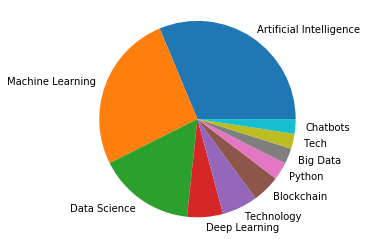

In [40]:
plt.pie(value, labels=top)
plt.axis('equal')
plt.show()

In [41]:
tag_df = pd.DataFrame(tag)

In [42]:
tag_df.head()

0
tag_name                      
Artificial Intelligence  32824
Machine Learning         27383
Data Science             16689
Deep Learning             6194
Technology                6163

In [43]:
#tag_df['marker'] = 1

In [44]:
tag_df.head()

0
tag_name                      
Artificial Intelligence  32824
Machine Learning         27383
Data Science             16689
Deep Learning             6194
Technology                6163

In [81]:
df = pd.merge(tag_df, df_dummy, on=['tag_name'], how='left')

In [82]:
df.shape

(104913, 5)

In [84]:
df

tag_name      0        postId  \
0       Artificial Intelligence  32824  1002a55eca89   
1       Artificial Intelligence  32824  10033db0a000   
2       Artificial Intelligence  32824   1003ff48854   
3       Artificial Intelligence  32824  10050686d0e4   
4       Artificial Intelligence  32824  10062f0bf74c   
5       Artificial Intelligence  32824   100a2247898   
6       Artificial Intelligence  32824  100a259bd314   
7       Artificial Intelligence  32824  100c041c1bf8   
8       Artificial Intelligence  32824  100c15ab725a   
9       Artificial Intelligence  32824  100c470f532b   
10      Artificial Intelligence  32824  100d3c69c32c   
11      Artificial Intelligence  32824  100deb28f54d   
12      Artificial Intelligence  32824  100fd9450b25   
13      Artificial Intelligence  32824  101080780ce7   
14      Artificial Intelligence  32824  101092e5c3bc   
15      Artificial Intelligence  32824  10156fa9a37d   
16      Artificial Intelligence  32824  1015d9e326ae   
17      Artificial Intelligence  32824  1018533fb246   
18      Artificial Intelligence  32824  101a8e64d930   
19      Artificial Intelligence  32824  101a9ce85535   
20      Artificial Intelligence  32824  1025b28e0922   
21      Artificial Intelligence  32824  1026f43cec02   
22      Artificial Intelligence  32824  1027bdf8d0f6   
23      Artificial Intelligence  32824  102b5073a875   
24      Artificial Intelligence  32824  102eb9230f07   
25      Artificial Intelligence  32824  10302ca9d62d   
26      Artificial Intelligence  32824  1031c873db7b   
27      Artificial Intelligence  32824  10320e7a97b0   
28      Artificial Intelligence  32824  10333d773a20   
29      Artificial Intelligence  32824  10345496b61d   
...                         ...    ...           ...   
104883                 Chatbots   2515  fb8287245a2d   
104884                 Chatbots   2515  fbde1c3909d8   
104885                 Chatbots   2515  fbec19e0c8ca   
104886                 Chatbots   2515  fc038f715f40   
104887                 Chatbots   2515  fc5a5f780a31   
104888                 Chatbots   2515  fc6b1b7827de   
104889                 Chatbots   2515   fc8a212e767   
104890                 Chatbots   2515  fcd74a221f90   
104891                 Chatbots   2515  fcdc0e70469d   
104892                 Chatbots   2515   fceec4ea23d   
104893                 Chatbots   2515  fd085c513386   
104894                 Chatbots   2515  fd0abf7007b4   
104895                 Chatbots   2515  fd0ac9b1e624   
104896                 Chatbots   2515  fd15385e7bad   
104897                 Chatbots   2515  fd2ed759bf93   
104898                 Chatbots   2515   fd7c1dab843   
104899                 Chatbots   2515  fd8f7ad86333   
104900                 Chatbots   2515  fdeed4a58acb   
104901                 Chatbots   2515  fe58a3e5d122   
104902                 Chatbots   2515  fe6573c05a05   
104903                 Chatbots   2515  fe840fd43c7a   
104904                 Chatbots   2515  fe8577f248f8   
104905                 Chatbots   2515  fef04928207e   
104906                 Chatbots   2515   fefe75dfdde   
104907                 Chatbots   2515  ff09da28cb69   
104908                 Chatbots   2515  ff113f10d815   
104909                 Chatbots   2515  ff58cb39e3b8   
104910                 Chatbots   2515  ff8474482dc6   
104911                 Chatbots   2515  ffb829c59b01   
104912                 Chatbots   2515  ffe3f43436b8   

                                                     text  \
0       Can a robot love us better than another human ...   
1       2017 Big Data, AI and IOT Use Cases\nAn Active...   
2       Artificial Intelligence is the Next Frontier\n...   
3       Ai and it’s impact on the world\n\n\nActually ...   
4       The Meta Model and Meta Meta-Model of Deep Lea...   
5       Don’t trust “Do you trust this computer”\nfrom...   
6       The Cultural Revolution: Robots and Trust\n\nI...   
7       A Little Snippet to Automate Web Scraping usin...   
8

In [47]:
#df[df['postId']=='100139913e4c'].to_csv('same2.csv',sep=',')

In [48]:
#text = ""
#for ind, row in df_drop_duplicate.iterrows():
#    text += str(row["title"]) + " "
#text = text.strip()

In [49]:
#plt.figure(figsize=(10,8))
#wordcloud = WordCloud(background_color='white', width=600, height=300, max_font_size=100, max_words=40).generate(text)
#plt.imshow(wordcloud)
#plt.axis("off")
#plt.show()

In [50]:
#df_test = df_drop_duplicate[df_drop_duplicate['totalClapCount']!=0]

In [51]:
#df_new = df_test.groupby('postId').size()

In [52]:
#df_new

In [53]:
#df_new

In [54]:
group_df = joined.groupby('postId')['tag_name'].apply(list).to_frame()

In [55]:
group_df.head()

tag_name
postId                                      
10007d3018fe                    [Blockchain]
1000b3d0d2    [Machine Learning, Blockchain]
1000c43bcb97                    [Technology]
100139913e4c                  [Data Science]
1002a55eca89       [Artificial Intelligence]

In [56]:
df_drop_duplicate = joined.drop_duplicates(subset='postId')

In [57]:
df_drop_duplicate.head()

tag_name      0        postId  \
0  Artificial Intelligence  32824  1002a55eca89   
1  Artificial Intelligence  32824  10033db0a000   
2  Artificial Intelligence  32824   1003ff48854   
3  Artificial Intelligence  32824  10050686d0e4   
4  Artificial Intelligence  32824  10062f0bf74c   

                                                text  \
0  Can a robot love us better than another human ...   
1  2017 Big Data, AI and IOT Use Cases\nAn Active...   
2  Artificial Intelligence is the Next Frontier\n...   
3  Ai and it’s impact on the world\n\n\nActually ...   
4  The Meta Model and Meta Meta-Model of Deep Lea...   

                                               title  
0  Can a robot love us better than another human ...  
1                2017 Big Data, AI and IOT Use Cases  
2       Artificial Intelligence is the Next Frontier  
3                    Ai and it’s impact on the world  
4  The Meta Model and Meta Meta-Model of Deep Lea...

In [58]:
result = pd.merge(df_drop_duplicate, group_df, on='postId')

In [59]:
result.head()

tag_name_x      0        postId  \
0  Artificial Intelligence  32824  1002a55eca89   
1  Artificial Intelligence  32824  10033db0a000   
2  Artificial Intelligence  32824   1003ff48854   
3  Artificial Intelligence  32824  10050686d0e4   
4  Artificial Intelligence  32824  10062f0bf74c   

                                                text  \
0  Can a robot love us better than another human ...   
1  2017 Big Data, AI and IOT Use Cases\nAn Active...   
2  Artificial Intelligence is the Next Frontier\n...   
3  Ai and it’s impact on the world\n\n\nActually ...   
4  The Meta Model and Meta Meta-Model of Deep Lea...   

                                               title  \
0  Can a robot love us better than another human ...   
1                2017 Big Data, AI and IOT Use Cases   
2       Artificial Intelligence is the Next Frontier   
3                    Ai and it’s impact on the world   
4  The Meta Model and Meta Meta-Model of Deep Lea...   

                                          tag_name_y  
0                          [Artificial Intelligence]  
1  [Artificial Intelligence, Data Science, Big Da...  
2                          [Artificial Intelligence]  
3                          [Artificial Intelligence]  
4  [Artificial Intelligence, Machine Learning, De...

In [60]:
result = result.drop(['tag_name_x'], axis=1)

In [61]:
result.set_index('postId', inplace=True)

In [102]:
df1= result[:1000]

In [103]:
df1.shape

(1000, 4)

In [62]:
result.head()

0                                               text  \
postId                                                                   
1002a55eca89  32824  Can a robot love us better than another human ...   
10033db0a000  32824  2017 Big Data, AI and IOT Use Cases\nAn Active...   
1003ff48854   32824  Artificial Intelligence is the Next Frontier\n...   
10050686d0e4  32824  Ai and it’s impact on the world\n\n\nActually ...   
10062f0bf74c  32824  The Meta Model and Meta Meta-Model of Deep Lea...   

                                                          title  \
postId                                                            
1002a55eca89  Can a robot love us better than another human ...   
10033db0a000                2017 Big Data, AI and IOT Use Cases   
1003ff48854        Artificial Intelligence is the Next Frontier   
10050686d0e4                    Ai and it’s impact on the world   
10062f0bf74c  The Meta Model and Meta Meta-Model of Deep Lea...   

                                                     tag_name_y  
postId                                                           
1002a55eca89                          [Artificial Intelligence]  
10033db0a000  [Artificial Intelligence, Data Science, Big Da...  
1003ff48854                           [Artificial Intelligence]  
10050686d0e4                          [Artificial Intelligence]  
10062f0bf74c  [Artificial Intelligence, Machine Learning, De...

In [63]:
s = result['tag_name_y']

In [64]:
s

postId
1002a55eca89                            [Artificial Intelligence]
10033db0a000    [Artificial Intelligence, Data Science, Big Da...
1003ff48854                             [Artificial Intelligence]
10050686d0e4                            [Artificial Intelligence]
10062f0bf74c    [Artificial Intelligence, Machine Learning, De...
100a2247898                             [Artificial Intelligence]
100a259bd314          [Artificial Intelligence, Technology, Tech]
100c041c1bf8    [Artificial Intelligence, Machine Learning, Py...
100c15ab725a                            [Artificial Intelligence]
100c470f532b                            [Artificial Intelligence]
100d3c69c32c    [Artificial Intelligence, Machine Learning, Te...
100deb28f54d    [Artificial Intelligence, Machine Learning, De...
100fd9450b25          [Artificial Intelligence, Blockchain, Tech]
101080780ce7                            [Artificial Intelligence]
101092e5c3bc                [Artificial Intelligence, Blockchain]
101

In [74]:
newDF= pd.get_dummies(s.apply(pd.Series).stack()).sum(level=0)

In [75]:
newDF

Artificial Intelligence  Big Data  Blockchain  Chatbots  \
postId                                                                  
1002a55eca89                        1         0           0         0   
10033db0a000                        1         1           0         0   
1003ff48854                         1         0           0         0   
10050686d0e4                        1         0           0         0   
10062f0bf74c                        1         0           0         0   
100a2247898                         1         0           0         0   
100a259bd314                        1         0           0         0   
100c041c1bf8                        1         0           0         0   
100c15ab725a                        1         0           0         0   
100c470f532b                        1         0           0         0   
100d3c69c32c                        1         0           0         0   
100deb28f54d                        1         0           0         0   
100fd9450b25                        1         0           1         0   
101080780ce7                        1         0           0         0   
101092e5c3bc                        1         0           1         0   
10156fa9a37d                        1         0           0         0   
1015d9e326ae                        1         0           0         0   
1018533fb246                        1         0           0         0   
101a8e64d930                        1         0           0         0   
101a9ce85535                        1         0           0         0   
1025b28e0922                        1         0           0         0   
1026f43cec02                        1         0           0         0   
1027bdf8d0f6                        1         0           1         0   
102b5073a875                        1         0           1         0   
102eb9230f07                        1         0           0         0   
10302ca9d62d                        1         0           0         0   
1031c873db7b                        1         0           0         0   
10320e7a97b0                        1         0           1         0   
10333d773a20                        1         0           1         0   
10345496b61d                        1         0           0         0   
...                               ...       ...         ...       ...   
de21b0f67c4a                        0         0           0         1   
de82f3a4cedc                        0         0           0         1   
df1970f23cf5                        0         0           0         1   
e07e052beb4f                        0         0           0         1   
e25d24b345f9                        0         0           0         1   
e32471808847                        0         0           0         1   
e422908c2421                        0         0           0         1   
e661889ea2a2                        0         0           0         1   
e8c31fe27214                        0         0           0         1   
e910665b9f10                        0         0           0         1   
e942082a6bf7                        0         0           0         1   
e9bc1bac216                         0         0           0         1   
ea47c1cbf671                        0         0           0         1   
ec8e6989bff4                        0         0           0         1   
ee16358569e                         0         0           0         1   
effd62250bba                        0         0           0         1   
f0d85050b44c                        0         0           0         1   
f199e59b363e                        0         0           0         1   
f51d2948f634                        0         0           0         1   
f5b939b5d715                        0         0           0         1   
fa350dfb1205                        0         0           0         1   
fa39e2eac049                        0         0           0         1   

In [94]:

stopWordList=stopwords.words('english')
stopWordList.remove('no')
stopWordList.remove('not')
#def removeTags(data):
#    soup=BeautifulSoup(data,'html.parser')
#    text=soup.get_text()
#    return text


#nlp = spacy.load('en_core', parse=True, tag=True, entity=True)
def removeAscendingChar(data):
    data=unicodedata.normalize('NFKD', data).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return data

def removeCharDigit(text):
    str='`1234567890-=~@#$%^&*()_+[!{;":\'><.,/?"}]'
    for w in text:
        if w in str:
            text=text.replace(w,'')
    return text

lemma=WordNetLemmatizer()
token=ToktokTokenizer()

def lemitizeWords(text):
    words=token.tokenize(text)
    listLemma=[]
    for w in words:
        x=lemma.lemmatize(w,'v')
        #print(x)
        listLemma.append(x)
    return text

def stopWordsRemove(text):
    
    wordList=[x.lower().strip() for x in token.tokenize(text)]
    
    removedList=[x for x in wordList if not x in stopWordList]
    text=' '.join(removedList)
    #print(text)
    return text

def PreProcessing(text):
    #text=removeTags(text)
    #print(text)
    text=removeCharDigit(text)
    #print(text)
    text=removeAscendingChar(text)
    #print(text)
    text=lemitizeWords(text)
    #print(text)
    text=stopWordsRemove(text)
    #print(text)
    return(text)

In [96]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sweet\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [104]:
totalText=''
for x in df1['text']:
    ps=PreProcessing(x)
    totalText=totalText+" "+ps

In [105]:
totalText

' robot love us better another human discussed michelle tsng podcast crazy wisdom says robot love us better human no judgement human beings particularly ones traumatized subconsciously detect someone judging know keep true feelings hidden people judge thus best guide find someone withhold judgmental thoughts express safe warm loving connection robots become sophisticated might able provide loving warm connection audio clip michelle discusses experiences talking sofia robotic companion human beings says soon build robots better love humans think would ever feel comfortable sharing intimate experiences seeking therapeutic treatment robot check full interview website big data ai iot use cases active list interesting use cases mentioned class image source randstad article ive heard use cases big data last days ever therefore ive decided start post compiled examples additional sources us learn plan updating dailyweekly basis please follow stay loop big data professors ie working professiona

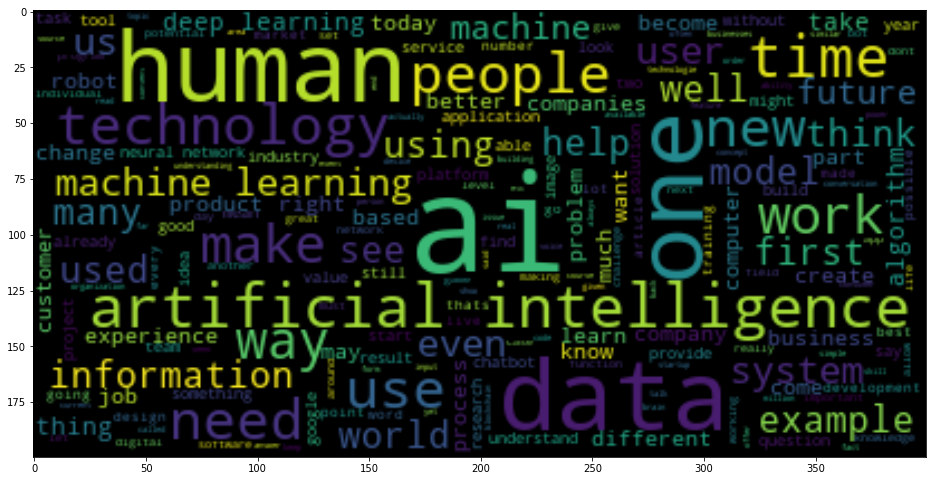

In [106]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc=WordCloud(max_font_size=60).generate(totalText)
plt.figure(figsize=(16,12))
plt.imshow(wc, interpolation="bilinear")

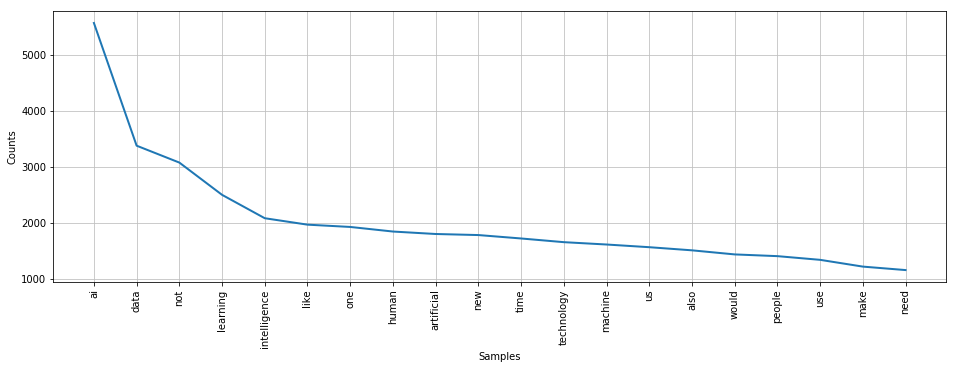

In [107]:
import nltk
freqdist = nltk.FreqDist(token.tokenize(totalText))
freqdist
plt.figure(figsize=(16,5))
freqdist.plot(20)

In [109]:
totalText_tit=''
for x in df1['title']:
    ps=PreProcessing(x)
    totalText_tit=totalText_tit+" "+ps

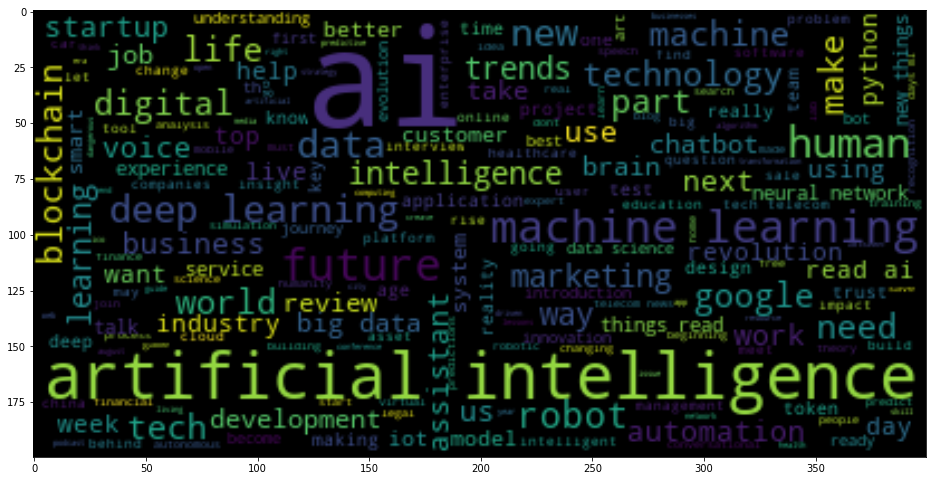

In [111]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc=WordCloud(max_font_size=60).generate(totalText_tit)
plt.figure(figsize=(16,12))
plt.imshow(wc, interpolation="bilinear")

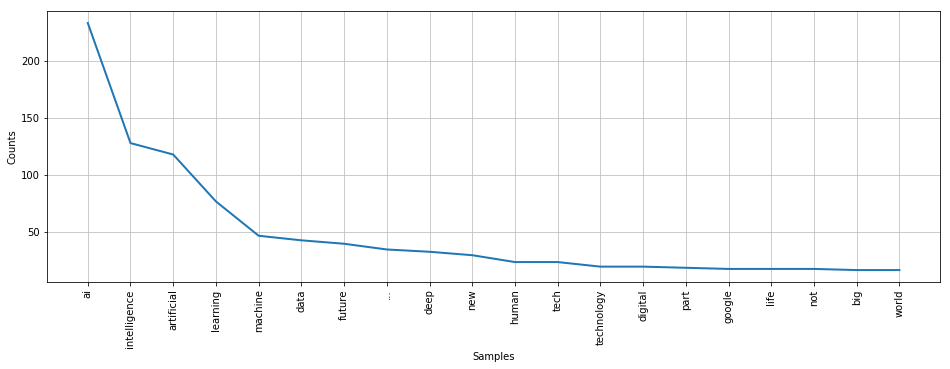

In [112]:
import nltk
freqdist = nltk.FreqDist(token.tokenize(totalText_tit))
freqdist
plt.figure(figsize=(16,5))
freqdist.plot(20)

In [117]:
df_old = pd.merge(df1, newDF, on='postId')

In [119]:
df_old

0                                               text  \
postId                                                                   
1002a55eca89  32824  Can a robot love us better than another human ...   
10033db0a000  32824  2017 Big Data, AI and IOT Use Cases\nAn Active...   
1003ff48854   32824  Artificial Intelligence is the Next Frontier\n...   
10050686d0e4  32824  Ai and it’s impact on the world\n\n\nActually ...   
10062f0bf74c  32824  The Meta Model and Meta Meta-Model of Deep Lea...   
100a2247898   32824  Don’t trust “Do you trust this computer”\nfrom...   
100a259bd314  32824  The Cultural Revolution: Robots and Trust\n\nI...   
100c041c1bf8  32824  A Little Snippet to Automate Web Scraping usin...   
100c15ab725a  32824  \nProduct Release Wrap-up July\nOur new Unleas...   
100c470f532b  32824  AI Saturdays by AiDevNepal : A Review from par...   
100d3c69c32c  32824  Is the age of theory over as Machine Learning ...   
100deb28f54d  32824  AI based UI Development (AI-UI)\nArtificial In...   
100fd9450b25  32824  Session “Ask About: AI and Diagnosis” at the A...   
101080780ce7  32824  A Historic Phase Change in the Way We Build Th...   
101092e5c3bc  32824  Five tech trends that shaped 2017\n“The histor...   
10156fa9a37d  32824  Building Smarter Businesses With Cognitive Ser...   
1015d9e326ae  32824  To perform like Magnus… relax like Magnus?\nMa...   
1018533fb246  32824  Making the Switch\nThe Painstakingly Slow Begi...   
101a8e64d930  32824  August 2018 Update\nHello everyone!\nIt’s Tim ...   
101a9ce85535  32824  The Sapien Zoo\nA short fiction story about fu...   
1025b28e0922  32824  \nThis week — Vladimir Putin on AI; the ethics...   
1026f43cec02  32824  The Bigger Picture\nLast week was… tough.\nAft...   
1027bdf8d0f6  32824  Upcoming Events — Meet Team Verv!\nTeam Verv, ...   
102b5073a875  32824  Kepler Technology - The Future Of AI Robotics\...   
102eb9230f07  32824  \nAssumptions & Common Objections\nFor simplic...   
10302ca9d62d  32824  Fakebuster: Fighting fake news with artificial...   
1031c873db7b  32824  \nThis week — a cyborg artist; extreme biohack...   
10320e7a97b0  32824  Why Opet Token is a Market-Sustainable ICO tha...   
10333d773a20  32824  Explore Medium Writing to Earn Free ARF Tokens...   
10345496b61d  32824  A Franchise Called Creativity\nWill Artificial...   
...             ...                                                ...   
18b6cf404c41  32824  \nBasics of Music for Magenta by Google\nI rea...   
18b757db73c   32824  5 features of Kingston that enterprises can le...   
18ba23d63ff3  32824  Transparency in machine learning specification...   
18bb319d2368  32824  AI and Automation Testing\n\nCourtesy: pcmag.c...   
18bb81f91ebe  32824  \nAdding More Fuel to Take TripActions to New ...   
18be24b8615f  32824  Can we beat the state of the art from 2013 wit...   
18bf19c2075e  32824  Bestseller [Udemy 100% Off] 23+ Hours Deep Lea...   
18bf95294da   32824  Digital Davids vs Financial Goliaths\nBy Ravis...   
18c3f8890034  32824  \nScam victim? Your grocery store protects you...   
18c4a2514904  32824  Watson Conversation How-Tos have been publishe...   
18c56712829a  32824  Artificial intelligence possibilities for the ...   
18c850544502  32824  Humanity’s Search for Meaning in the Age of AI...   
18c921a5e493  32824  Why Artificial Intelligence Matters — Post By ...   
18ccd805062d  32824  My talk at the inaugural Black in AI workshop ...   
18cdb3b418c1  32824  Technology Fridays: Comet.ML Wants to be the G...   
18cf3607d2af  32824  Virtualizing China’s Biggest Online Marketplac...   
18d01ac2724a  32824  ServAdvisor Bitcointalk ANN thread in Chinese\...   
18d0a92b6bd6  32824  GOOGLE REINSTATES A SEPARATION BETWEEN AI AND ...   
18d539875b58  32824  Why does AI need decentralization?\n\nAs we pr...   
18d7e7746771  32824  I want you to be prepared.\nthe announcement t...   
18d83de8d630  32824  What is the best way to learn Artificial Intel...   
18d8dcaf15b9  32824  D

In [120]:
df = df_old.drop([0], axis=1)

In [124]:
df = df_old.drop(['tag_name_y',0], axis=1)

In [125]:
df

text  \
postId                                                            
1002a55eca89  Can a robot love us better than another human ...   
10033db0a000  2017 Big Data, AI and IOT Use Cases\nAn Active...   
1003ff48854   Artificial Intelligence is the Next Frontier\n...   
10050686d0e4  Ai and it’s impact on the world\n\n\nActually ...   
10062f0bf74c  The Meta Model and Meta Meta-Model of Deep Lea...   
100a2247898   Don’t trust “Do you trust this computer”\nfrom...   
100a259bd314  The Cultural Revolution: Robots and Trust\n\nI...   
100c041c1bf8  A Little Snippet to Automate Web Scraping usin...   
100c15ab725a  \nProduct Release Wrap-up July\nOur new Unleas...   
100c470f532b  AI Saturdays by AiDevNepal : A Review from par...   
100d3c69c32c  Is the age of theory over as Machine Learning ...   
100deb28f54d  AI based UI Development (AI-UI)\nArtificial In...   
100fd9450b25  Session “Ask About: AI and Diagnosis” at the A...   
101080780ce7  A Historic Phase Change in the Way We Build Th...   
101092e5c3bc  Five tech trends that shaped 2017\n“The histor...   
10156fa9a37d  Building Smarter Businesses With Cognitive Ser...   
1015d9e326ae  To perform like Magnus… relax like Magnus?\nMa...   
1018533fb246  Making the Switch\nThe Painstakingly Slow Begi...   
101a8e64d930  August 2018 Update\nHello everyone!\nIt’s Tim ...   
101a9ce85535  The Sapien Zoo\nA short fiction story about fu...   
1025b28e0922  \nThis week — Vladimir Putin on AI; the ethics...   
1026f43cec02  The Bigger Picture\nLast week was… tough.\nAft...   
1027bdf8d0f6  Upcoming Events — Meet Team Verv!\nTeam Verv, ...   
102b5073a875  Kepler Technology - The Future Of AI Robotics\...   
102eb9230f07  \nAssumptions & Common Objections\nFor simplic...   
10302ca9d62d  Fakebuster: Fighting fake news with artificial...   
1031c873db7b  \nThis week — a cyborg artist; extreme biohack...   
10320e7a97b0  Why Opet Token is a Market-Sustainable ICO tha...   
10333d773a20  Explore Medium Writing to Earn Free ARF Tokens...   
10345496b61d  A Franchise Called Creativity\nWill Artificial...   
...                                                         ...   
18b6cf404c41  \nBasics of Music for Magenta by Google\nI rea...   
18b757db73c   5 features of Kingston that enterprises can le...   
18ba23d63ff3  Transparency in machine learning specification...   
18bb319d2368  AI and Automation Testing\n\nCourtesy: pcmag.c...   
18bb81f91ebe  \nAdding More Fuel to Take TripActions to New ...   
18be24b8615f  Can we beat the state of the art from 2013 wit...   
18bf19c2075e  Bestseller [Udemy 100% Off] 23+ Hours Deep Lea...   
18bf95294da   Digital Davids vs Financial Goliaths\nBy Ravis...   
18c3f8890034  \nScam victim? Your grocery store protects you...   
18c4a2514904  Watson Conversation How-Tos have been publishe...   
18c56712829a  Artificial intelligence possibilities for the ...   
18c850544502  Humanity’s Search for Meaning in the Age of AI...   
18c921a5e493  Why Artificial Intelligence Matters — Post By ...   
18ccd805062d  My talk at the inaugural Black in AI workshop ...   
18cdb3b418c1  Technology Fridays: Comet.ML Wants to be the G...   
18cf3607d2af  Virtualizing China’s Biggest Online Marketplac...   
18d01ac2724a  ServAdvisor Bitcointalk ANN thread in Chinese\...   
18d0a92b6bd6  GOOGLE REINSTATES A SEPARATION BETWEEN AI AND ...   
18d539875b58  Why does AI need decentralization?\n\nAs we pr...   
18d7e7746771  I want you to be prepared.\nthe announcement t...   
18d83de8d630  What is the best way to learn Artificial Intel...   
18d8dcaf15b9  Do any companies offer artificial intelligence...   
18ddc926a2ef  What Are Chatbots?\nUnderstanding Chatbots is ...   
18de97c14ef6  The problem with ‘explainable AI’\n\nThe first...   
18e22cd66c2b  Blockchain will make AI smarter by feeding it ...   
18e2d0f56651  Review: Batch Normalization (Inception-v2 / BN...   
18e3b47f8be1  \nWhat do supercomputers actually do?\nIn our ...   
18e78180db7e  Do electric moths sniff o

In [126]:
df.shape

(1000, 12)

In [137]:
x=df.iloc[:,0:2].values

In [138]:
x

array([['Can a robot love us better than another human can?\n\nI discussed this with Michelle Tsng on my Podcast “Crazy Wisdom”.\nShe says that a robot can love us better than a human being because there is no judgement. Human beings, particularly ones who have been traumatized can subconsciously detect when someone is judging them. They know when to keep their true feelings hidden from people who judge them and thus the best guide they can find is someone who can withhold judgmental thoughts and just express a safe, warm, and loving connection.\nAs robots become more sophisticated they might be able to provide this loving and warm connection. In this audio clip, Michelle discusses her experiences talking with Sofia, a robotic companion to human beings. She says that soon we will build robots who are better at love than humans are.\nWhat do you think? Would you ever feel comfortable sharing your most intimate experiences or seeking therapeutic treatment from a robot?\nYou can check out

In [141]:
y=df.iloc[:,2:].values

In [143]:
y.shape

(1000, 10)

In [128]:
x=df.iloc[:,0:2].values
y=df.iloc[:,2:-1].values
# using binary relevance
from sklearn.feature_extraction.text import CountVectorizer
from pandas import DataFrame
x1=df.title
x2=df.text
from pandas import DataFrame
cv=CountVectorizer().fit(x1)
header=DataFrame(cv.transform(x1).todense(),columns=cv.get_feature_names())
cvArticle=CountVectorizer().fit(x2)
article=DataFrame(cvArticle.transform(x2).todense(),columns=cvArticle.get_feature_names())
import pandas as pd
x=pd.concat([header,article],axis=1)

In [136]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 1, 0, 0]], dtype=uint8)

In [129]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfhead=TfidfTransformer().fit(header)
head=DataFrame(tfidfhead.transform(header).todense())
tfidfart=TfidfTransformer().fit(article)
art=DataFrame(tfidfart.transform(article).todense())
import pandas as pd
x=pd.concat([head,art],axis=1)

In [131]:
#!pip3 install scikit-multilearn

# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
xtrain,xtest,ytrain,ytest=train_test_split(x,y)
classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(xtrain.astype(float), ytrain.astype(float))

predictions = classifier.predict(xtest.astype(float))
predictions.toarray()
from sklearn.metrics import accuracy_score
accuracy_score(ytest.astype(float),predictions)

0.5

In [132]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.naive_bayes import GaussianNB

# initialize classifier chains multi-label classifier
# with a gaussian naive bayes base classifier
classifier = ClassifierChain(GaussianNB())

# train
classifier.fit(xtrain.astype(float), ytrain.astype(float))

# predict
predictions = classifier.predict(xtest.astype(float))

accuracy_score(ytest.astype(float),predictions)

0.5

In [133]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB

# initialize Label Powerset multi-label classifier
# with a gaussian naive bayes base classifier
classifier = LabelPowerset(GaussianNB())

# train
classifier.fit(xtrain.astype(float), ytrain.astype(float))
# predict
predictions = classifier.predict(xtest.astype(float))

accuracy_score(ytest.astype(float),predictions)

0.512

In [134]:
from skmultilearn.adapt import MLkNN

classifier = MLkNN(k=7)

# train
classifier.fit(xtrain.astype(float), ytrain.astype(float))
# predict
predictions = classifier.predict(xtest.astype(float))

accuracy_score(ytest.astype(float),predictions)

0.564